In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import make_scorer #CHANGE (updated to be consistent with scikit_learn .24)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

print (pd.__version__)

######### DEFINITION OF GLOBAL VARIABLES #########
RUN_CONFIGURATION_LOOP = False

1.3.2


In [2]:
import os 
import sys
#sys.path.append('/')
import circuits


In [3]:
#These are super long functions to be hard coded because i dont have time to properly fix them, sorry bout it
#[(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    #graph_df = pd.DataFrame(df["Labels"], x_data, z_data, columns=["Labels", "XSyn", "ZSyn"])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
    
def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

In [4]:
#These functions needed to work with the GraphDecoder/MWPM module
import time

def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))
    
def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    #decoder.graph_2D(G,'distance')
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 

import random
def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs

def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   

def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

In [5]:
#Function needed for preprocessing. CSV file reads in a string, needs to be a list for labels 
#for preprocessing csv files
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows

def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)

def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)

def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

In [42]:
#x_d7= trainData_d7.dropna()
#######################################################################################################

##trainData_d7 = pd.read_csv("depth7_all_combos.csv")
##trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
##trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
##trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
##trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
##trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

##testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
##mlb_d7 = MultiLabelBinarizer()
##mlb_d7.fit(trainData_d7['Labels'])
##df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
##df['Labels']= df.values.tolist()
##trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
##trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
##trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

#######################################################################################

##trainData_d5 = pd.read_csv("depth5_all_combos.csv") # RM FOR D7 TESTS
##trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05  # RM FOR D7 TESTS
#These four lines remove duplicates
##trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x)) # RM FOR D7 TESTS
##trainData_d5['Labels'] = trainData_d5['Labels'].astype(str) # RM FOR D7 TESTS
##trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True) # RM FOR D7 TESTS
##trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x)) # RM FOR D7 TESTS


##testData_d5_MWPM = graph_with_errs_d5(trainData_d5) # RM FOR D7 TESTS


#transforms the data to encoding for ML
##mlb = MultiLabelBinarizer() # RM FOR D7 TESTS
##mlb.fit(trainData_d5['Labels']) # RM FOR D7 TESTS
##df = pd.DataFrame(mlb.transform(trainData_d5['Labels'])) # RM FOR D7 TESTS
##df['Labels']= df.values.tolist() # RM FOR D7 TESTS
##trainData_d5 = trainData_d5.drop(['Labels'], axis=1) # RM FOR D7 TESTS
##trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True) # RM FOR D7 TESTS
##trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"] # RM FOR D7 TESTS
#########################################################################################

#Has no duplicates, small enough to check manually
# Change the CSV file to whichever dataset I'm using
trainData_d3 = pd.read_csv("v3samples.csv") # RM FOR D7 TESTS

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x)) # RM FOR D7 TESTS
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01)) # RM FOR D7 TESTS

testData_d3_MWPM = graph_with_errs_d3(trainData_d3) # RM FOR D7 TESTS

mlb_d3 = MultiLabelBinarizer() # RM FOR D7 TESTS
mlb_d3.fit(trainData_d3["Labels"]) # RM FOR D7 TESTS
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels'])) # RM FOR D7 TESTS
df['Labels']= df.values.tolist() # RM FOR D7 TESTS
trainData_d3 = trainData_d3.drop(['Labels'], axis=1) # RM FOR D7 TESTS
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True) # RM FOR D7 TESTS
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"] # RM FOR D7 TESTS
#########################################################################################
y_d3 = trainData_d3["Labels"] # RM FOR D7 TESTS
x_d3 = trainData_d3.drop(["Labels"], axis=1) # RM FOR D7 TESTS

##y_d5 = trainData_d5["Labels"]  # RM FOR D7 TESTS
##x_d5 = trainData_d5.drop(["Labels"], axis=1)  # RM FOR D7 TESTS

##y_d7 = trainData_d7["Labels"]
##x_d7 = trainData_d7.drop(["Labels"], axis=1)


x_d3 = x_d3.replace([-1], 0) # RM FOR D7 TESTS
##x_d5 = x_d5.replace([-1], 0) # RM FOR D7 TESTS
##x_d7 = x_d7.replace([-1], 0)

print("Done!")

Done!


In [ ]:
# Brett: Not sure why this was here. It's just a duplicate. Consider removing.
##y_d7 = trainData_d7["Labels"] 

In [43]:
#functions for creating lookup tables here:
from collections import defaultdict
from math import log2

def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)

class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
        
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
        
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])

In [44]:
def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

In [45]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 2
    #input layer
    model.add(Dense(8, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(128, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE  (added tf., changed lr to learning_rate)
    return model

#make any needed changes here
def compile_FFNN_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(24, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE (added tf.)
    return model


#make any needed changes here
def compile_FFNN_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(48, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE  (added tf.)
    return model


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200


C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

20/20 [==============================] - 1s 11ms/step - loss: 0.6788 - accuracy: 0.0484 - val_loss: 0.6642 - val_accuracy: 0.0750
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.0531 - val_loss: 0.6375 - val_accuracy: 0.0688
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6211 - accuracy: 0.0641 - val_loss: 0.6060 - val_accuracy: 0.0688
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.0734 - val_loss: 0.5682 - val_accuracy: 0.0750
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.0750 - val_loss: 0.5268 - val_accuracy: 0.0688
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.0719 - val_loss: 0.4900 - val_accuracy: 0.0625
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.0812 - val_loss: 0.4665 - val_accuracy: 0.0625
Epoch 8/200
20/20 [=====

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.0312 - val_loss: 0.4410 - val_accuracy: 0.0188
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.0375 - val_loss: 0.4407 - val_accuracy: 0.0125
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.0344 - val_loss: 0.4403 - val_accuracy: 0.0125
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.0375 - val_loss: 0.4401 - val_accuracy: 0.0125
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.0344 - val_loss: 0.4399 - val_accuracy: 0.0125
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.0359 - val_loss: 0.4398 - val_accuracy: 0.0125
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.0344 - val_loss: 0.4395 - val_accuracy: 0.0125
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.0406 - val_loss: 0.4286 - val_accuracy: 0.0188
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.0484 - val_loss: 0.4284 - val_accuracy: 0.0188
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.0391 - val_loss: 0.4282 - val_accuracy: 0.0188
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.0437 - val_loss: 0.4282 - val_accuracy: 0.0188
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.0406 - val_loss: 0.4280 - val_accuracy: 0.0188
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.0359 - val_loss: 0.4280 - val_accuracy: 0.0188
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.0406 - val_loss: 0.4277 - val_accuracy: 0.0188
Epoch 123/200

20/20 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.0719 - val_loss: 0.4195 - val_accuracy: 0.0188
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3856 - accuracy: 0.0734 - val_loss: 0.4192 - val_accuracy: 0.0125
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3854 - accuracy: 0.0703 - val_loss: 0.4189 - val_accuracy: 0.0188
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.0688 - val_loss: 0.4187 - val_accuracy: 0.0125
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.0734 - val_loss: 0.4186 - val_accuracy: 0.0188
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.0734 - val_loss: 0.4184 - val_accuracy: 0.0188
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.0734 - val_loss: 0.4182 - val_accuracy: 0.0188
Epoch 180/200

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/200


C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

20/20 [==============================] - 1s 12ms/step - loss: 0.6915 - accuracy: 0.0250 - val_loss: 0.6840 - val_accuracy: 0.0621
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.0406 - val_loss: 0.6710 - val_accuracy: 0.0683
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.0453 - val_loss: 0.6584 - val_accuracy: 0.0745
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.0641 - val_loss: 0.6456 - val_accuracy: 0.0807
Epoch 5/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6355 - accuracy: 0.0703 - val_loss: 0.6319 - val_accuracy: 0.1056
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.0906 - val_loss: 0.6167 - val_accuracy: 0.1553
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6022 - accuracy: 0.1156 - val_loss: 0.5994 - val_accuracy: 0.1925
Epoch 8/200
20/20 [=====

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.0453 - val_loss: 0.4563 - val_accuracy: 0.0435
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.0453 - val_loss: 0.4562 - val_accuracy: 0.0435
Epoch 61/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.0594 - val_loss: 0.4562 - val_accuracy: 0.0435
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.0453 - val_loss: 0.4560 - val_accuracy: 0.0435
Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.0609 - val_loss: 0.4560 - val_accuracy: 0.0435
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.0437 - val_loss: 0.4559 - val_accuracy: 0.0373
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.0594 - val_loss: 0.4558 - val_accuracy: 0.0435
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.0578 - val_loss: 0.4490 - val_accuracy: 0.0373
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.0656 - val_loss: 0.4488 - val_accuracy: 0.0311
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.0594 - val_loss: 0.4485 - val_accuracy: 0.0311
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.0656 - val_loss: 0.4483 - val_accuracy: 0.0311
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.0656 - val_loss: 0.4482 - val_accuracy: 0.0311
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.0672 - val_loss: 0.4479 - val_accuracy: 0.0373
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.0578 - val_loss: 0.4477 - val_accuracy: 0.0373
Epoch 123/200

20/20 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.0688 - val_loss: 0.4351 - val_accuracy: 0.0435
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.0688 - val_loss: 0.4349 - val_accuracy: 0.0435
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.0641 - val_loss: 0.4347 - val_accuracy: 0.0435
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.0703 - val_loss: 0.4344 - val_accuracy: 0.0435
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.0688 - val_loss: 0.4342 - val_accuracy: 0.0435
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.0672 - val_loss: 0.4341 - val_accuracy: 0.0435
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.0703 - val_loss: 0.4339 - val_accuracy: 0.0435
Epoch 180/200

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200


C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

20/20 [==============================] - 1s 12ms/step - loss: 0.6864 - accuracy: 0.0500 - val_loss: 0.6782 - val_accuracy: 0.0248
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.0562 - val_loss: 0.6628 - val_accuracy: 0.0435
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6533 - accuracy: 0.0562 - val_loss: 0.6468 - val_accuracy: 0.0559
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.0594 - val_loss: 0.6290 - val_accuracy: 0.0621
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.0656 - val_loss: 0.6083 - val_accuracy: 0.0559
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.0672 - val_loss: 0.5838 - val_accuracy: 0.0497
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.0719 - val_loss: 0.5555 - val_accuracy: 0.0435
Epoch 8/200
20/20 [=====

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.0672 - val_loss: 0.4564 - val_accuracy: 0.0373
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.0531 - val_loss: 0.4561 - val_accuracy: 0.0497
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.0578 - val_loss: 0.4560 - val_accuracy: 0.0559
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.0672 - val_loss: 0.4558 - val_accuracy: 0.0497
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.0641 - val_loss: 0.4558 - val_accuracy: 0.0497
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.0656 - val_loss: 0.4556 - val_accuracy: 0.0497
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.0562 - val_loss: 0.4555 - val_accuracy: 0.0497
Epoch 

20/20 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.0719 - val_loss: 0.4441 - val_accuracy: 0.0745
Epoch 117/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.0688 - val_loss: 0.4437 - val_accuracy: 0.0745
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.0719 - val_loss: 0.4436 - val_accuracy: 0.0745
Epoch 119/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.0734 - val_loss: 0.4432 - val_accuracy: 0.0807
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.0750 - val_loss: 0.4428 - val_accuracy: 0.0745
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.0719 - val_loss: 0.4425 - val_accuracy: 0.0807
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.0781 - val_loss: 0.4422 - val_accuracy: 0.0745
Epoch 123/200

20/20 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.0828 - val_loss: 0.4282 - val_accuracy: 0.0745
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.0750 - val_loss: 0.4279 - val_accuracy: 0.0870
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.0734 - val_loss: 0.4278 - val_accuracy: 0.0621
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.0750 - val_loss: 0.4277 - val_accuracy: 0.0745
Epoch 177/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.0828 - val_loss: 0.4275 - val_accuracy: 0.0745
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.0750 - val_loss: 0.4274 - val_accuracy: 0.0745
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.0797 - val_loss: 0.4272 - val_accuracy: 0.0621
Epoch 180/200

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200


C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

20/20 [==============================] - 1s 12ms/step - loss: 0.6890 - accuracy: 0.0484 - val_loss: 0.6816 - val_accuracy: 0.0373
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.0516 - val_loss: 0.6668 - val_accuracy: 0.0435
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.0531 - val_loss: 0.6518 - val_accuracy: 0.0559
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.0594 - val_loss: 0.6358 - val_accuracy: 0.0559
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.0547 - val_loss: 0.6180 - val_accuracy: 0.0621
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.0625 - val_loss: 0.5977 - val_accuracy: 0.0683
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.0703 - val_loss: 0.5745 - val_accuracy: 0.0683
Epoch 8/200
20/20 [=====

20/20 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.0875 - val_loss: 0.4418 - val_accuracy: 0.0497
Epoch 59/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.0953 - val_loss: 0.4416 - val_accuracy: 0.0497
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.0891 - val_loss: 0.4412 - val_accuracy: 0.0497
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.0859 - val_loss: 0.4409 - val_accuracy: 0.0497
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.0891 - val_loss: 0.4405 - val_accuracy: 0.0497
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.0797 - val_loss: 0.4402 - val_accuracy: 0.0497
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.0891 - val_loss: 0.4399 - val_accuracy: 0.0559
Epoch 65/200
20/20 

Epoch 116/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.1266 - val_loss: 0.4212 - val_accuracy: 0.0932
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.1281 - val_loss: 0.4210 - val_accuracy: 0.0932
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.1297 - val_loss: 0.4206 - val_accuracy: 0.0932
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.1219 - val_loss: 0.4202 - val_accuracy: 0.0807
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.1234 - val_loss: 0.4198 - val_accuracy: 0.0807
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.1234 - val_loss: 0.4195 - val_accuracy: 0.0932
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.1328 - val_loss: 0.4193 - val_accuracy: 0.0932

20/20 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.1203 - val_loss: 0.4064 - val_accuracy: 0.0870
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.1281 - val_loss: 0.4062 - val_accuracy: 0.0932
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.1234 - val_loss: 0.4058 - val_accuracy: 0.0870
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.1234 - val_loss: 0.4058 - val_accuracy: 0.0932
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.1203 - val_loss: 0.4055 - val_accuracy: 0.0932
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.1203 - val_loss: 0.4053 - val_accuracy: 0.0932
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.1234 - val_loss: 0.4051 - val_accuracy: 0.0807
Epoch 180/200

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/200


C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:99: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

20/20 [==============================] - 1s 24ms/step - loss: 0.6720 - accuracy: 0.0609 - val_loss: 0.6527 - val_accuracy: 0.0497
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.0422 - val_loss: 0.6109 - val_accuracy: 0.0311
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.0359 - val_loss: 0.5648 - val_accuracy: 0.0186
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.0281 - val_loss: 0.5197 - val_accuracy: 0.0186
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.0219 - val_loss: 0.4883 - val_accuracy: 0.0186
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.0188 - val_loss: 0.4734 - val_accuracy: 0.0186
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.0109 - val_loss: 0.4681 - val_accuracy: 0.0062
Epoch 8/200
20/20 [=====

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.0719 - val_loss: 0.4428 - val_accuracy: 0.0559
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.0750 - val_loss: 0.4423 - val_accuracy: 0.0559
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.0875 - val_loss: 0.4419 - val_accuracy: 0.0559
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.0844 - val_loss: 0.4415 - val_accuracy: 0.0683
Epoch 63/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 0.0922 - val_loss: 0.4410 - val_accuracy: 0.0683
Epoch 64/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.0906 - val_loss: 0.4405 - val_accuracy: 0.0683
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.0906 - val_loss: 0.4400 - val_accuracy: 0.0683
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.1172 - val_loss: 0.4198 - val_accuracy: 0.0745
Epoch 117/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3831 - accuracy: 0.1187 - val_loss: 0.4195 - val_accuracy: 0.0745
Epoch 118/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.1187 - val_loss: 0.4191 - val_accuracy: 0.0745
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.1187 - val_loss: 0.4190 - val_accuracy: 0.0745
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.1203 - val_loss: 0.4188 - val_accuracy: 0.0745
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.1156 - val_loss: 0.4187 - val_accuracy: 0.0745
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.1234 - val_loss: 0.4185 - val_accuracy: 0.0745
Epoch 123/200

20/20 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.1172 - val_loss: 0.4089 - val_accuracy: 0.0807
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3683 - accuracy: 0.1141 - val_loss: 0.4088 - val_accuracy: 0.0932
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3681 - accuracy: 0.1203 - val_loss: 0.4084 - val_accuracy: 0.0932
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.1234 - val_loss: 0.4083 - val_accuracy: 0.0932
Epoch 177/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.1219 - val_loss: 0.4082 - val_accuracy: 0.0807
Epoch 178/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.1187 - val_loss: 0.4081 - val_accuracy: 0.0807
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.1219 - val_loss: 0.4080 - val_accuracy: 0.0807
Epoch 180/200

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your cu

[199, 0]
[0, 1]
both b and c are zero
[199, 0]
[0, 1]
both b and c are zero
[18, 16]
[148, 18]
[0, 34]
[162, 4]
[64, 12]
[105, 19]
[50, 26]
[100, 24]
[52, 16]
[101, 31]
[50, 18]
[94, 38]
[47, 20]
[110, 23]
[42, 25]
[108, 25]
[70, 16]
[87, 27]
[65, 21]
[95, 19]
[56, 33]
[103, 8]
[63, 26]
[82, 29]
[31, 32]
[135, 2]
[35, 28]
[120, 17]
[156, 8]
[18, 18]
[150, 14]
[20, 16]
[153, 19]
[18, 10]
[157, 15]
[12, 16]
[43, 25]
[110, 22]
[33, 35]
[118, 14]
[37, 27]
[134, 2]
[46, 18]
[115, 21]
[154, 12]
[24, 10]
[148, 18]
[15, 19]
[152, 14]
[28, 6]
[147, 19]
[27, 7]
[76, 13]
[80, 31]
[68, 21]
[89, 22]
[146, 10]
[32, 12]
[138, 18]
[29, 15]
[155, 10]
[18, 17]
[158, 7]
[16, 19]
[33, 25]
[128, 14]
[23, 35]
[138, 4]
[21, 33]
[146, 0]
[32, 22]
[114, 32]
------------------------------------------------------------------------
------------------------------------------------------------------------
Average scores for all folds of MWPM:
> Accuracy: 0.8331246399581026 (+- 0.005944809603621249)
> F1: 0.39706908

C:\Users\User\AppData\Local\Temp/ipykernel_4540/3963942960.py:136: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


<Figure size 720x720 with 0 Axes>

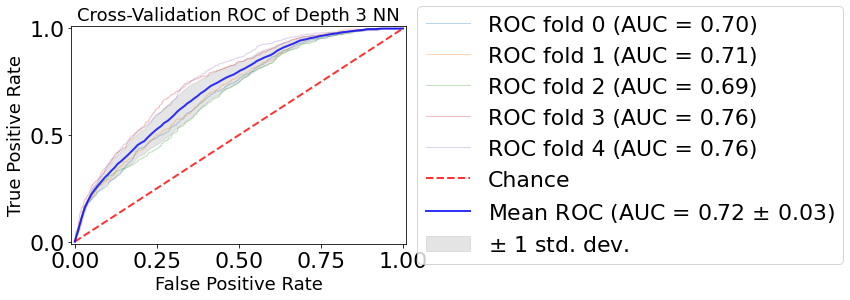

In [46]:
# D3 TESTING

from sklearn.metrics import roc_auc_score
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

#for i in range(5):
    
    # K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d3 = translate_to_graph(testData_d3_MWPM, targets[test], mlb_d3)
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
    
############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
"""
plt.rcParams.update({'font.size': 22})

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3.values,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)"""

Fit model on training data


NameError: name 'x_train_d3' is not defined

Text(0, 0.5, 'Loss (MSE)')

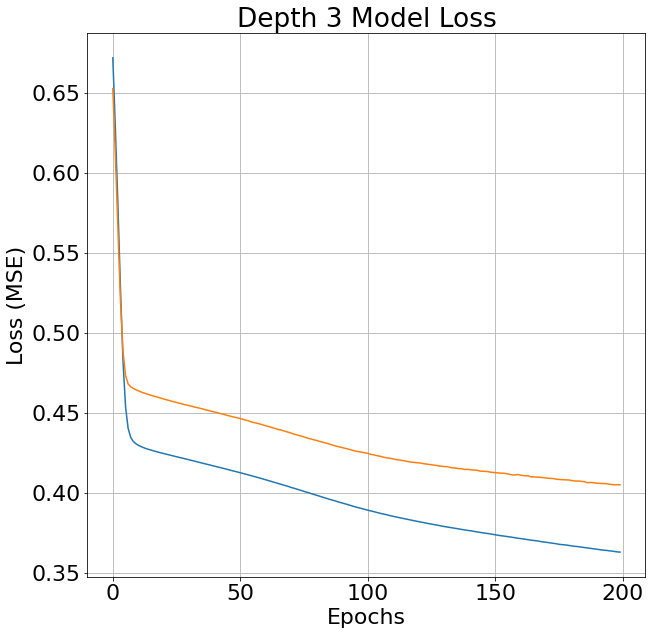

In [47]:

# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

Text(0, 0.5, 'Accuracy')

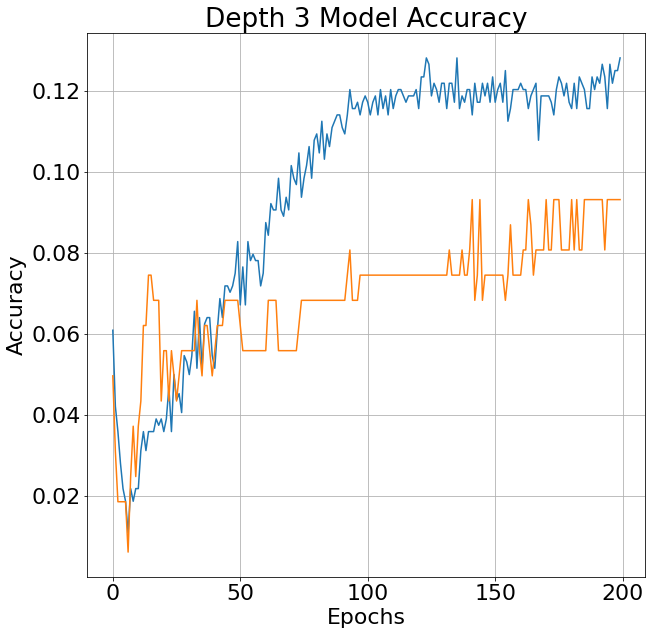

In [48]:

# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [28]:

start = time.time()
predictions_d3 = model.predict(x_test_d3.values)
end = time.time()
print("Time: " + str(end - start))
# predict

thresholds=[0.1, .2, .3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d3.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0

    precision = precision_score(Y_test_d3, pred, average='micro')
    recall = recall_score(Y_test_d3, pred, average='micro')
    f1 = f1_score(Y_test_d3, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d3, pred))
    print("Partial Accuracy = ",partial_accuracy(Y_test_d3, pred))
    print("\n")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# D5 TESTING

kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
#targets = np.stack(targets)
targets = np.array([np.array(xi) for xi in targets])


n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d5 = translate_to_graph(testData_d5_MWPM, targets[test], mlb)
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800
)
   # Generate generalization metrics

    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# D7 TESTING

kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
   # x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    
    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro')
    else:
        inputs_test_2 = np.asarray(inputs_test_2).astype(np.int) #CHANGE (added)
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro')
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold
print("Train complete")
print('------------------------------------------------------------------------')

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

print(len(mlb_d7.classes_))

for class_ in mlb_d7.classes_:
    print("interating")
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('-----------------------------------------------')

In [ ]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
#f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

if fold_no < 3:
    acc = partial_accuracy(targets[test], pred_plut_d7)
    f1 = f1_score(targets[test], pred_plut_d7, average='micro')
else:
    pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
    #f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
    acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

pred = model_d7.predict(inputs_test_2)
pred[pred>=.5]=1 
pred[pred<.5]=0
acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
f1 = f1_score(targets_test_2, pred, average='micro')

#acc_per_fold.append(acc)
f1_per_fold.append(f1)

# Increase fold number
fold_no = fold_no + 1

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
"""
model_d5 = compile_FFNN_model_DepthFive(5)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5.values,
    y=Y_train_d5,
    validation_split=.25,
    epochs = 500
)"""

In [ ]:
"""
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')"""

In [ ]:
"""
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')"""

In [ ]:
"""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d5 = model_d5.predict(x_test_d5.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d5.copy()

thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d5.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d5, pred, average='micro')
    recall = recall_score(Y_test_d5, pred, average='micro')
    f1 = f1_score(Y_test_d5, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d5, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d5, pred))
    print("\n")"""

In [ ]:
"""
pred=predictions_d5.copy()
from sklearn.metrics import multilabel_confusion_matrix, classification_report
#look at confusion matrix to see what got misclassified    
pred[pred>=.5]=1
pred[pred<.5]=0
multilabel_confusion_matrix(Y_test_d5, pred)
"""

In [ ]:
"""
#look at classifcation report to see what got mislabeled
print(classification_report(Y_test_d5, pred))
"""

In [ ]:
model_d7 = compile_FFNN_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_d7.values,#x=x_train_d7.values,
    y=y_d7,#y=Y_train_d7,
    validation_split=.25,
    epochs= 150
)

In [ ]:
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

In [ ]:
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
""""""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d7 = model_d7.predict(x_test_d7.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d7.copy()


thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d7.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d7, pred, average='micro')
    recall = recall_score(Y_test_d7, pred, average='micro')
    f1 = f1_score(Y_test_d7, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d7, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d7, pred))
    print("\n")

In [ ]:
"""
predictions_d7 = model_d7.predict(x_test_d7.values)
pred=predictions_d7.copy()

n_classes = 99

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_d7[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_d7.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()"""

In [27]:
"""
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()"""

C:\Users\User\AppData\Local\Temp/ipykernel_4540/2859714260.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


KeyError: 'micro'

<Figure size 432x288 with 0 Axes>

In [ ]:
"""
x_train_d3.to_csv("x_train_d3_01.csv")
x_test_d3.to_csv("x_test_d3_01.csv")
pd.DataFrame(Y_train_d3).to_csv("Y_train_d3_01.csv")
pd.DataFrame(Y_test_d3).to_csv("Y_test_d3_01.csv")

x_train_d5.to_csv("x_train_d5_01.csv")
x_test_d5.to_csv("x_test_d5_01.csv")
pd.DataFrame(Y_train_d5).to_csv("Y_train_d5_01.csv")
pd.DataFrame(Y_test_d5).to_csv("Y_test_d5_01.csv")

x_train_d7.to_csv("x_train_d7_01.csv")
x_test_d7.to_csv("x_test_d7_01.csv")
pd.DataFrame(Y_train_d7).to_csv("Y_train_d7_01.csv")
pd.DataFrame(Y_test_d7).to_csv("Y_test_d7_01.csv")"""

In [ ]:
"""
model_d7.save("model_d7_01.h5")
model_d5.save("model_d5_01.h5")
model.save("model_d3_01.h5")"""